# Grunduppgift

Text(0, 0.5, 'Height')

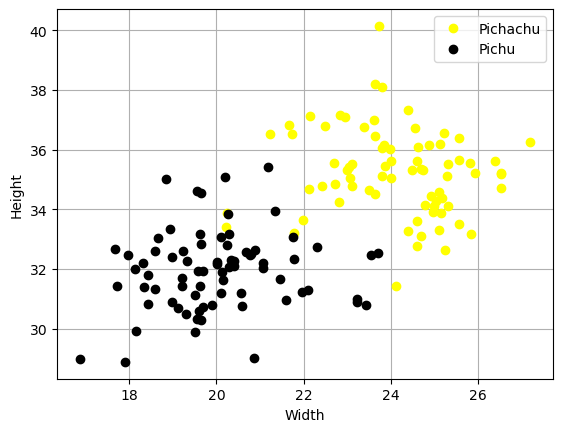

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

training_data = r"C:\Users\jubel\python-programming-JULIA-SALDE\Labs\datapoints.txt" 
test_data = r"testpoints.txt"

x = [] #list for [widths, heights] of points 
y = [] #list for the labels (1 means Pikachu, 0 means Pichu) 

with open(training_data, "r") as f: 
    next(f)

    for line in f:
        width, height, label = line.strip().split(",") 
        x.append([float(width), float(height)]) 
        y.append(int(label)) 

x = np.array(x) 
y = np.array(y)
y = (y == 1) # convert to bool, 1 becomes True, 0 becomes False 

widths =  x[ : , 0] #widths are first column
heights = x[ : , 1] # heights are on second spot of each line 

# y is flagging True, widths[y] are the values corresponding to Pikachu 
plt.plot(widths[y], heights[y], 'o',color= 'yellow', label= "Pichachu") 
plt.plot(widths[~y], heights[~y], 'o', color= "black", label= "Pichu")
plt.legend() 
plt.grid()
plt.xlabel("Width")
plt.ylabel("Height")


In [ ]:
def Euclidean(point_1, point_2): # function to calculate distance

    distance = np.sqrt(np.square(point_1[0] - point_2[0]) + np.square(point_1[1] - point_2[1])) 
    return distance

def Calculate_ALL_distances(test_point, training_points):

    distances = [] 
    for training_point in training_points: #looping through the array of training points...
        d = Euclidean(test_point, training_point) #... we get the distance to the test point
        distances.append(d) #saving the distance between the test point and each training point
    return distances 

def Pitchu_or_Pikachu(test_point, training_points):
    distances = Calculate_ALL_distances(test_point, training_points)
    index_smallest_distances = np.argmin(distances) #finding the smallest distance

    if y[index_smallest_distances] == True: #the matching index in y containing the labels
        return "Pikachu"
    else:
        return "Pichu" 

#here we manually added the test points into an array
x_test = np.array([[25,32], 
                   [24.2, 31.5],
                   [22, 34],
                   [20.5, 34]])

Pitchu_or_Pikachu(x_test[3], x) #we choose a testpoint, calculating its distance to each training point 


'Pichu'

## Task 1

In [13]:

while True:
    try: 
        input_weight = float(input("Write a weight: )"))
        if not input_weight > 0:
            raise ValueError("It must be a positive number")
        break
    except ValueError:
        print("Please use numbers")

while True:
    try: 
        input_height = float(input("Write a height: )"))
        if not input_height > 0:
            raise ValueError("It must be a positive number")
        break
    except ValueError:
        print("Please use numbers")

input_testpoint = [input_weight, input_height] #Collecting the point into a single variable
Pitchu_or_Pikachu(input_testpoint, x) #Calling our function to classify the point into Pikachu or Pichu


'Pikachu'

# Task 2

It's a tie


Text(0, 0.5, 'Height')

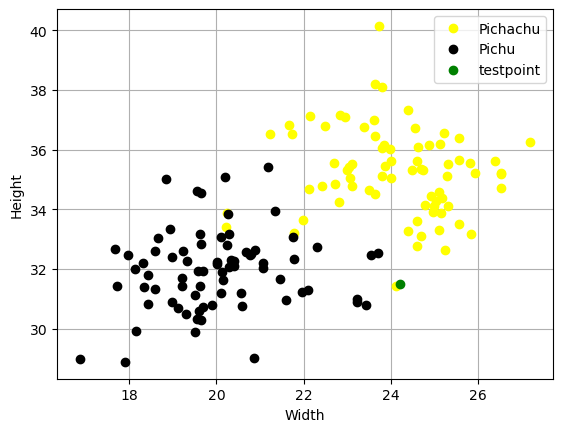

In [14]:
test_point = x_test[1]
distances = Calculate_ALL_distances(test_point, x)
sorted_distances = np.argsort(distances) #sorts the distances in the list 
ten_closest = sorted_distances[0:10] 

amount_of_Pikachu = np.sum(y[ten_closest]) #counts when it is true 

if amount_of_Pikachu > 5:
    print("The majority says Pikachu")
elif amount_of_Pikachu < 5:
    print("Majority says Pitchu")  
else:
    print("It's a tie")

plt.plot(widths[y], heights[y], 'o',color= 'yellow', label= "Pichachu") 
plt.plot(widths[~y], heights[~y], 'o', color= "black", label= "Pichu")
plt.plot(test_point[0], test_point[1], 'o', color='green', label= "testpoint")
plt.legend() 
plt.grid()
plt.xlabel("Width")
plt.ylabel("Height")

# Task 3 and 4 

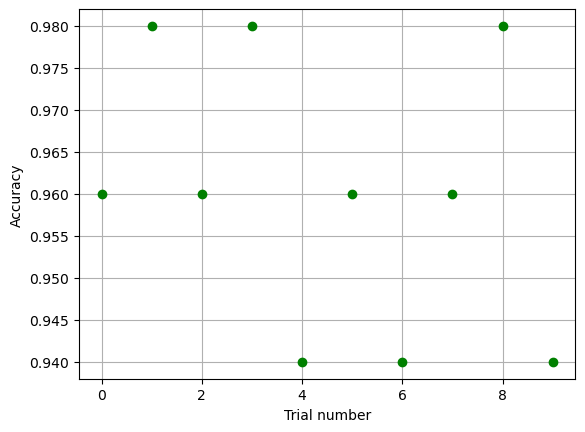

The mean accuracy is 0.96


In [ ]:
all_accuracies = [] #here we will put the accuracy of all 10 trials

for i in range(10): 
    
    pika_points = x[y]
    pichu_points = x[~y]

    np.random.shuffle(pika_points)
    np.random.shuffle(pichu_points)

    randomized_training_points = np.concat([pika_points[:50], pichu_points[:50]])
    labels_training = np.array([True for _ in range(50)] + [False for _ in range(50)])

    randomized_testing_points = np.concat([pika_points[50:], pichu_points[50:]])
    labels_testing = [True for _ in range(25)] + [False for _ in range(25)]

    predicted_labels = [] 

    for point in randomized_testing_points:

        distances = Calculate_ALL_distances(point, randomized_training_points)
        sorted_distances = np.argsort(distances)  
        ten_closest = sorted_distances[0:10] 
        amount_of_Pikachu_per_loop = np.sum(labels_training[ten_closest]) 
        predicted_labels.append(amount_of_Pikachu_per_loop > 5) 

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(labels_testing)):

        a = predicted_labels[i]
        b = labels_testing[i]

        if (a == True) and (True == b):
            TP += 1
        elif (a== True) and (False == b):
            FP += 1
        elif (a== False) and (False == b):
            TN += 1
        elif (a== False) and (True == b): 
            FN +=1 
        else: print(a,b)
        
    accuracy = (TP + TN) / (TP+FP+TN+FN)
    all_accuracies.append(accuracy)

plt.plot(all_accuracies, 'o', color='green')    
plt.xlabel("Trial number")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print(f"The mean accuracy is {np.round(np.mean(all_accuracies), 3)}")